# **GOLD PRICE PREDICTION**

OBJECTIVE:
1. The main goal of this notebook is to build a machine learning system that  
   can predict GLD (gold) prices based on several other stock prices.
2. Obtain data insights using pandas.
3. Find the correlation of the other features with GLD (gold) stock price.
   Predict the GLD (gold) price by splitting the data and evaluate the model.

**Data Overview:** This data file is a Comma separated value(CSV) file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly, the data shows the value of the variables SPX, GLD, USO, SLV, EUR/USD against the dates in the date column.

Data consists of,
**Date**

**SPX** - The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States.

**GLD** - SPDR Gold Shares is part of the SPDR family of exchange-traded funds (ETF) managed and marketed by State Street Global Advisors.

**USO** - The United States Oil Fund ® LP (USO) is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca.

**SLV** - The iShares Silver Trust (SLV) is an exchange traded fund (ETF) that tracks the price performance of the underlying holdings in the LMBA Silver Price.

**EUR/USD** - The Currency Pair EUR/USD is the shortened term for the euro against U.S. dollar pair, or cross for the currencies of the European Union (EU) and the United States (USD).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso,Ridge
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor


from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/self/gld_price_data.csv',parse_dates=["Date"])

NameError: name 'pd' is not defined

In [ ]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
df['Date'].unique()

<DatetimeArray>
['2008-01-02 00:00:00', '2008-01-03 00:00:00', '2008-01-04 00:00:00',
 '2008-01-07 00:00:00', '2008-01-08 00:00:00', '2008-01-09 00:00:00',
 '2008-01-10 00:00:00', '2008-01-11 00:00:00', '2008-01-14 00:00:00',
 '2008-01-15 00:00:00',
 ...
 '2018-04-30 00:00:00', '2018-05-01 00:00:00', '2018-05-02 00:00:00',
 '2018-05-03 00:00:00', '2018-05-07 00:00:00', '2018-05-08 00:00:00',
 '2018-05-09 00:00:00', '2018-05-10 00:00:00', '2018-05-14 00:00:00',
 '2018-05-16 00:00:00']
Length: 2290, dtype: datetime64[ns]

In [ ]:
df.shape

(2290, 6)

In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [ ]:
df.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [ ]:
correlation = df.corr()
correlation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

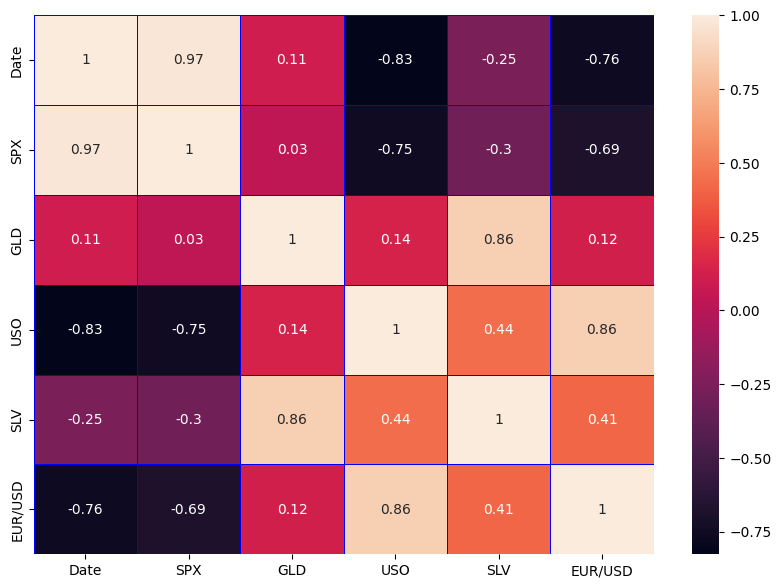

In [ ]:
plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),linewidths=0.7,linecolor='blue',annot=True)

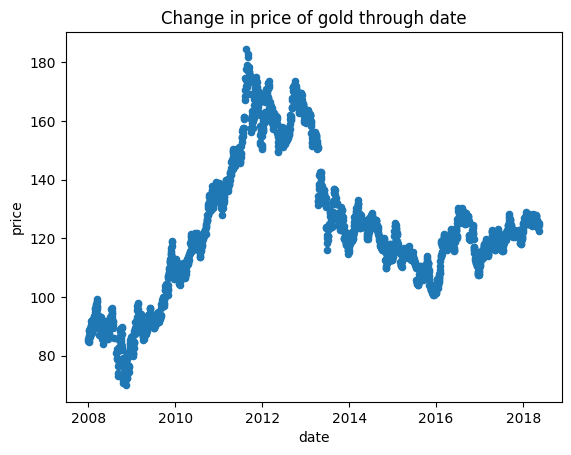

In [ ]:
df.plot.scatter(x='Date',y='GLD')
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

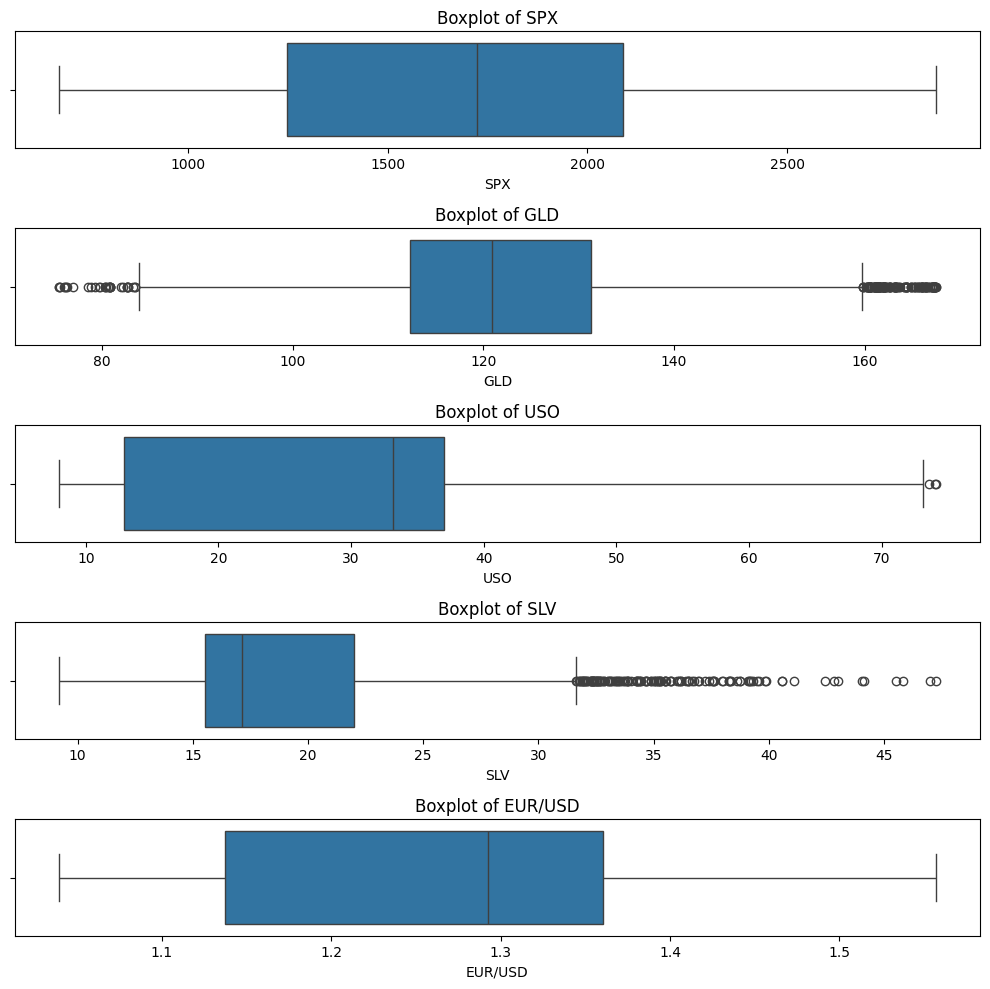

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(10, 10))
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, columns):


  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return df

df = remove_outliers(df, ['SPX', 'GLD', 'USO', 'EUR/USD'])



In [ ]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [ ]:
x=df.drop(columns=['Date','GLD'])
y=df['GLD']
print(x)
print(y)

              SPX        USO        SLV   EUR/USD
6     1420.329956  74.019997  16.061001  1.480100
7     1401.020020  73.089996  16.077000  1.479006
9     1380.949951  72.779999  15.834000  1.480210
10    1373.199951  71.849998  15.654000  1.466405
11    1333.250000  71.029999  15.717000  1.464000
...           ...        ...        ...       ...
2285  2671.919922  14.060000  15.510000  1.186789
2286  2697.790039  14.370000  15.530000  1.184722
2287  2723.070068  14.410000  15.740000  1.191753
2288  2730.129883  14.380000  15.560000  1.193118
2289  2725.780029  14.405800  15.454200  1.182033

[2048 rows x 4 columns]
6        88.250000
7        88.580002
9        87.989998
10       86.699997
11       86.500000
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2048, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
svr=SVR()
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
decision=DecisionTreeRegressor()
rf=RandomForestRegressor(n_estimators=100)
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
ada=AdaBoostRegressor()

In [ ]:
models=[knn,svr,lr,lasso,ridge,decision,rf,gbr,xgb,ada]

for model in models:
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  print(f"Model: {model}")
  print(f"R2 Score: {r2_score(y_test, y_pred)}")
  print(f"Mean Absolute Error:{mean_absolute_error(y_test, y_pred)}")
  print(f"Mean Squared Error:{mean_squared_error(y_test, y_pred)}")
  print('\n')



Model: KNeighborsRegressor()
R2 Score: 0.9296740105624272
Mean Absolute Error:3.5057944497560976
Mean Squared Error:24.51830560633283


Model: SVR()
R2 Score: 0.18175672934685283
Mean Absolute Error:12.47504706297814
Mean Squared Error:285.2706194487004


Model: LinearRegression()
R2 Score: 0.8181344202659866
Mean Absolute Error:5.583366747937888
Mean Squared Error:63.40523466292129


Model: Lasso()
R2 Score: 0.8193850442602615
Mean Absolute Error:5.430622316990851
Mean Squared Error:62.96921973393885


Model: Ridge()
R2 Score: 0.8186553270654493
Mean Absolute Error:5.552819691129906
Mean Squared Error:63.22362680779143


Model: DecisionTreeRegressor()
R2 Score: 0.9827212820139912
Mean Absolute Error:1.2888443146341457
Mean Squared Error:6.024016035247734


Model: RandomForestRegressor()
R2 Score: 0.9895145578589507
Mean Absolute Error:1.1362950260731681
Mean Squared Error:3.655622578335402


Model: GradientBoostingRegressor()
R2 Score: 0.9761745315086182
Mean Absolute Error:1.94638561

**MODEL FINALIZED WITH RANDOM FOREST AS ITS HAVING HIGHEST R2_SCORE AND LOWEST MAE AND MSE**

# **BUILDING SEPARATE MODEL FOR RANDOM FOREST**

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
random_forest.predict(x_test)

In [ ]:
random_forest.score(x_test,y_test)

0.9892187654559397

In [ ]:
random_forest.score(x_train,y_train)

0.998390813842938

In [ ]:
# HYPERPARAMETER TUNING DOE RANDOM FOREST WITH RANDOMIZED SEARCHCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt', 'log2', None]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
rf_random.fit(x_train, y_train)
best_params = rf_random.best_params_
print(f"Best parameters: {best_params}")
rf_best = RandomForestRegressor(**best_params)
rf_best.fit(x_train, y_train)
y_pred = rf_best.predict(x_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error:{mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error:{mean_squared_error(y_test, y_pred)}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 1100, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 25}
R2 Score: 0.9839098345894306
Mean Absolute Error:1.4709034128212783
Mean Squared Error:5.609641555672398



**EVEN WITHOUT TUNING MODEL GIVES BEST PERFORMANCE**


In [ ]:
models=['knn','svr','lr','lasso','ridge','decision','rf','gbr','xgb','ada']
# models=[knn,svr,lr,lasso,ridge,decision,rf,gbr,xgb,ada]
r2score= [0.9296, 0.1817,  0.818, 0.8193, 0.8186, 0.9827, 0.9895, 0.9761,  0.9887, 0.91948]

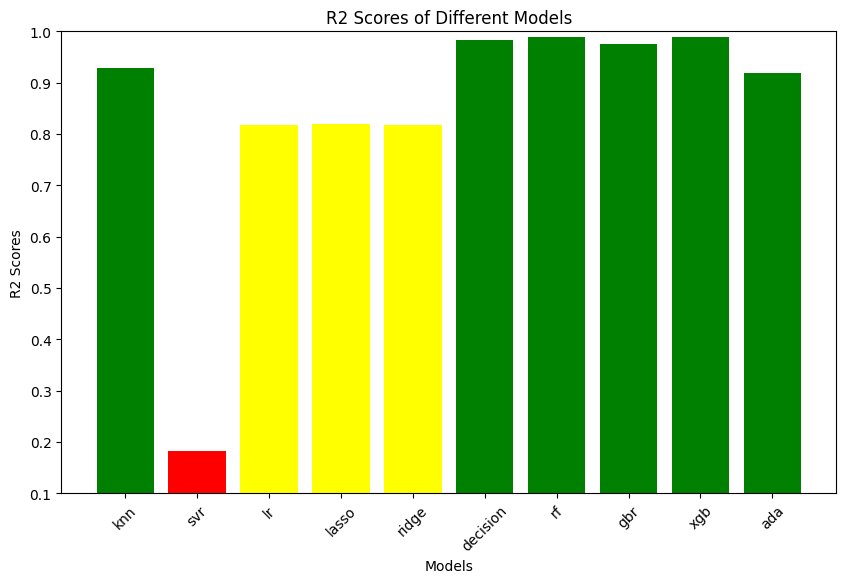

In [ ]:
colors = []
for score in r2score:
    if score > 0.9:
        colors.append('green')
    elif 0.7 <= score <= 0.9:
        colors.append('yellow')
    else:
        colors.append('red')
plt.figure(figsize=(10, 6))
plt.bar(models, r2score, color=colors)
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.title('R2 Scores of Different Models')
plt.xticks(rotation=45)
plt.ylim(0.1, 1)
plt.show()

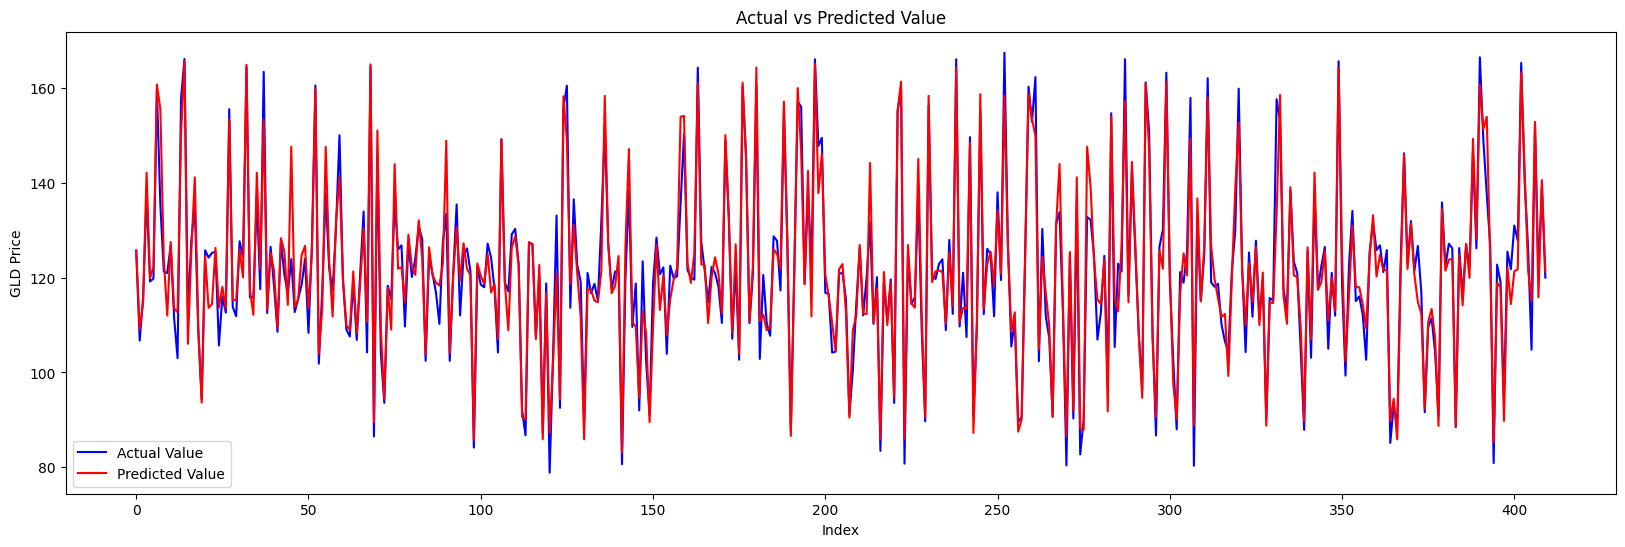

In [ ]:
y_test = list(y_test)
plt.figure(figsize=(20, 6))
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(y_pred, color='red', label='Predicted Value')
plt.title('Actual vs Predicted Value')
plt.xlabel('Index')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# **CONCLUSION**

With highest r2_score(0.9895) and lowest values of mean absolute error(1.1362) and mean squared error(3.6556) we can conclude that Random Forest as the best model for this project.

As I compare actual values and predicted values are very close to each other.

